## Final Project: Linear Regression

- We want to present the relationship between (two) variables linearly,
- For example, recall the running distance and drinking water,
- We are interested to obtain the best line describing by y_pred[i] = w_1 x[i] +w_0 that maps running distance to drinking water,
- Below, list x represents running distance in miles and list y represents the drinking water in litres:

Text(0, 0.5, 'Water Drinks (Litre)')

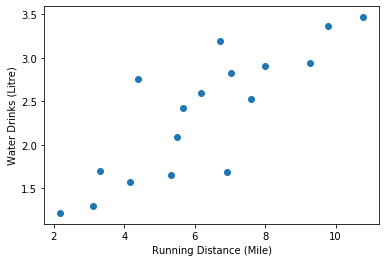

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Running Distance in Mile
x = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])

# Water Drinks in Litre
y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

plt.scatter(x, y)
plt.xlabel('Running Distance (Mile)')
plt.ylabel('Water Drinks (Litre)')

## In order to obtain the best line, we should define error first.

- For linear relationship, mean-square-error (MSE) represents is it a good line (good model) or not
- $y[i]$ and $y_{pred}[i]$ are i-th element of list y and list y_pred respectively where y_pred[i] = w_1 x[i] +w_0
- Define error as: $E[i] = y_{pred}[i] - y[i]$
- Define mean-square-error as: $MSE = \frac{1}{N} \sum_{i=0}^{N-1} E[i]^2$
- Also mean-square-error is equal to: $MSE = \frac{1}{N} \sum_{i=0}^{N-1} (y_{pred}[i] - y[i])^2$
- The parameter $N$ is: $N = len(y)$

## Question 1: Obtain the MSE for the following two lines:

1- y_pred[i] = 0.7*x[i] + 0.3

2- y_pred[i] = 0.25163494*x[i] + 0.79880123

Hint: Your function take four input arguments: 1- y, 2- x, 3- slope, 4-intercept

In [65]:
def min_sq_error(y, x, w1, w0):
    y_pred = (w1 * x) + w0
    sum_squared_error = sum([(i - j) ** 2 for i, j in zip(y_pred, y)])
    n = len(y)
    mse = sum_squared_error / n
    return mse

print(min_sq_error(y, x, 0.7, 0.3))
print(min_sq_error(y, x, 0.25163494, 0.79880123))

6.518593101764703
0.15385767404191164


## Question 3: Write a code to return the slope and intercept with given list x and y.

### --> Question 5: (Optional but Bonus point) In almost all applications, we update the slope and intercept through iteration.
- Instead of putting the $\frac{\partial MSE}{\partial w_1} = 0$ $\frac{\partial MSE}{\partial w_0} = 0$
- Initialize the $w_1$ and $w_0$ with arbitrary value, then update them by follwing Gradient Updating Rule:
- $w_1 = w_1 - step*\frac{\partial MSE}{\partial w_1}$
- $w_0 = w_0 - step*\frac{\partial MSE}{\partial w_0}$

In [66]:
def slope_intercept_LR(x, y):
    w0 = np.random.randn()
    w1 = np.random.randn()
    n = len(x)
    step = 0.01
    epoch = 5000
    for _ in range(epoch):
        i = ((w1 * x) + w0) - y
        w1 = w1 - step * (i * x).sum() * (2 / n)
        w0 = w0 - step * i.sum() * (2 / n)
    return w1, w0

print(slope_intercept_LR(x, y))

(0.2516365400145903, 0.7987899131605705)


## Question 4: After obtain the best line, obtain the variance and mean of error.

- In Question 3, we have obtained the best line,
- So, we can error list which its element is: $E[i] = y_{pred}[i] - y[i]$,
- Write a function that calculate variance and mean of list $E$,
- Plot the distribution of the error for optimal line.

Slope: 0.25163575735277904
 Intercept: 0.7987915105887751
 e: [[-0.0708104901470541, -0.8540111570589968, 0.09278817602905987, -0.7027325575740773, 0.8486273090435339, 0.2746093472351583, -0.10646241825839864, -0.24159623745634473, 0.17870690889636842, 0.12308619677224719, -0.2561894861329552, 0.04919296818261376, 0.4857322894040901, -0.09287733786105079, -0.1984599173386119, 0.19145498124903648, 0.27886235838238993]]
 MSE: 0.15385767404191164


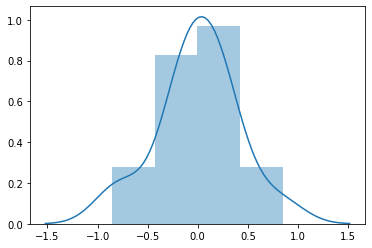

In [67]:
def mean_var(x, y, w1, w0):
    y_pred = [(w1 * i) + w0 for i in x]
    e = [[i - j for i, j in zip(y_pred, y)]]
    mean_e = np.mean(e)
    var_e = np.var(e)
    return var_e, mean_e, e

slope = slope_intercept_LR(x, y)[0]
intercept = slope_intercept_LR(x, y)[1]
e = mean_var(x, y, slope, intercept)[2]
mse = min_sq_error(y, x, 0.25163494, 0.79880123)

print("Slope: {}\n".format(slope), "Intercept: {}\n".format(intercept), "e: {}\n".format(e), "MSE: {}".format(mse))
sns.distplot(e, hist=True, kde=True, bins=4)